In [90]:
import numpy as np # numerical python
import cv2 # opencv
from glob import glob # glob use to extract path of file
import os
import matplotlib.pyplot as plt # visualze and display 

In [95]:
path = glob('./data/images/*.jpg')

In [96]:
print('The number of images =', len(path))


The number of images = 2


[[976 452 298 298]]


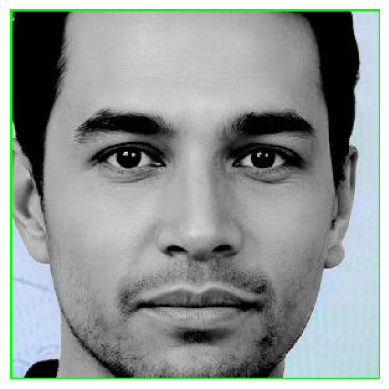

In [55]:
### Step -1 Read Image and Convert to RGB
img = cv2.imread(path[0]) # read image in BGR
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # this step will convert image from BGR to RGB

### Step -2: Apply Haar Cascade Classifier
haar = cv2.CascadeClassifier('./model/haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
faces_list = haar.detectMultiScale(gray,1.05,31)
print(faces_list)
for x,y,w,h in faces_list:
    cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(0,255,0),2)
    ### Step -3: crop Face 
    roi = img_rgb[y:y+h,x:x+w]
    
    plt.imshow(roi)
    plt.axis('off')
    plt.show()
    

### Step -4: Save Image


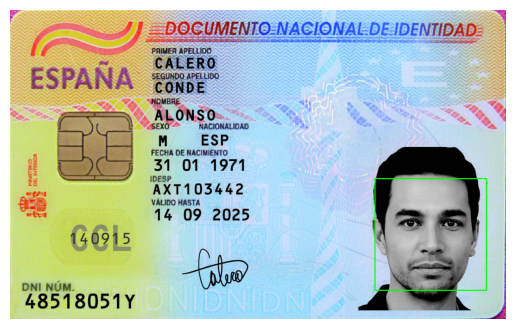

In [29]:
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [101]:
for i in range(len(path)):
    try:
        ### Step -1 Read Image and Convert to RGB 
        img = cv2.imread(path[i])
        original_image_name = os.path.basename(path[i]).split('.')[0]  # Extract the name without extension
        
        ### Step -2: Apply Haar Cascade Classifier
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces_list = haar.detectMultiScale(gray, 1.5, 1)
        
        # Process each detected face
        for (x, y, w, h) in faces_list:
            faces_list = sorted(faces_list, key=lambda x: x[2]*x[3], reverse=True)  
            x,y,w,h = faces_list[0]

            ### Step -3: Crop Face  
            roi = img[y:y+h, x:x+w]
            
            ### Step -4: Save Image with original image name included
            cv2.imwrite(f'./data/cropped_images/{original_image_name}_Cropped.jpg', roi)
            
        if len(faces_list) == 0:
            print(f'No face detected for:', original_image_name)
            
    except Exception as e:
        print('Error:', e)